# **DBSCAN**


# Step 1 : Import Libraries



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
from sklearn.datasets import make_blobs


# Step 2 : Prepare dataset
### **use make blobs with different numbers**



In [3]:
X ,y= make_blobs(n_samples=300, centers=6,cluster_std=0.50, random_state=0)


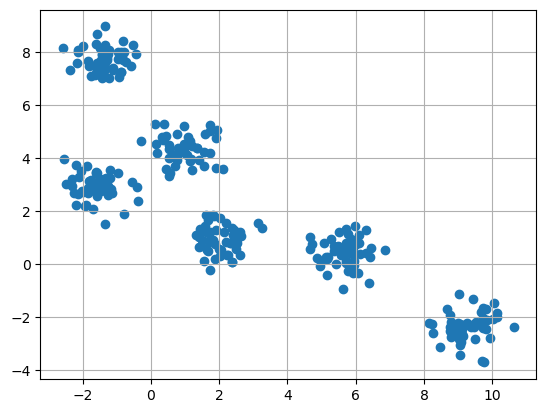

In [4]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

# Step 3 : Modeling The Data Using DBSCAN



['y', 'b', 'g', 'r']


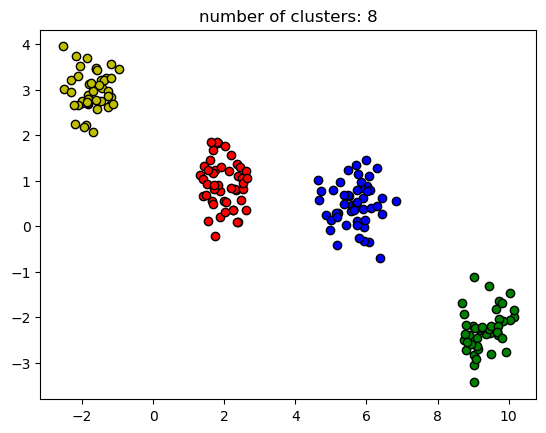

In [6]:
db = DBSCAN(eps=0.5, min_samples= 3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()



In [7]:
db.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 3,
 'n_jobs': None,
 'p': None}

In [8]:
db.labels_

array([ 0,  1,  2,  2,  3,  0, -1,  4,  0,  2,  1,  1,  4,  5,  0,  4,  4,
        1,  3,  5,  1,  5,  4,  6,  5,  4,  0, -1,  5,  5,  0,  1,  4,  1,
        3,  2,  3,  2,  5,  3,  4,  5,  4,  3,  1,  1,  1,  0,  0,  0,  2,
        5,  0,  5,  1, -1,  5,  0,  1,  5,  1,  3,  3,  5, -1,  1,  2,  1,
        5,  0,  0,  5,  3,  5,  1,  2,  3,  2,  5,  4,  1,  2,  0,  4,  1,
        1,  5,  3,  1,  3,  3,  1,  1,  3,  3,  1,  1,  1, -1,  3,  4,  2,
        1,  7,  0,  0,  3,  5, -1,  4,  5,  3,  3,  5,  4,  5,  2,  3,  3,
        3,  4,  2,  5,  3,  3,  2,  0,  5,  5,  0,  0,  0,  0,  5,  0,  2,
        2,  2,  5,  0,  3,  1,  2,  5,  1,  4,  1,  1,  2,  4,  2,  4,  5,
        2,  4,  1,  2,  5,  4,  1,  4,  0,  2,  1,  2, -1,  4,  2,  4,  4,
        0,  3,  5,  2,  4,  3,  3,  4,  1,  0,  4,  2,  5, -1,  0,  4,  5,
        3,  4,  5, -1, -1,  4,  4,  4,  0,  1,  5,  4,  1,  4,  3,  5,  5,
        2,  3,  5,  4,  3,  2,  0,  2,  4,  1,  5,  2,  3,  1,  3,  5,  4,
        4,  2,  5,  5,  0

# Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [11]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.56
Adjusted Rand Index: 0.92


# **Well Done :)**